# COVID-19 Vaccination Details for North Carolina
Our goal is to develop a tool that will accurately and efficiently give access to data dealing with this area. The data will consist of:

1. County-level vaccinations numbers (Fully & Partially)

2. Vaccinations based on Demographics

3. Vaccination Sites

These visualizations will give users insight on how COVID vaccinations are being administered between different communities and counties. As well as provide overview on how many vaccination sites are available per counties.

In [188]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline

# Get county-level data
county_url = 'https://raw.githubusercontent.com/hectorsantiago5/Nationwide-Hackathon-SJL/main/datasets/nc_county_vaccine_data%20-%20NC_County_Data-4.csv'
county_df = pd.read_csv(county_url)

# Get demographic data
demographics_url = 'https://raw.githubusercontent.com/hectorsantiago5/Nationwide-Hackathon-SJL/main/datasets/nc_county_demographics%20-%20nc_county_demographics.csv'
demo_df = pd.read_csv(demographics_url)

# Get Vaccine Location data
locations_url = 'https://raw.githubusercontent.com/hectorsantiago5/Nationwide-Hackathon-SJL/main/datasets/NC%20Vaccination%20SItes%20by%20County%20-%20Sheet1.csv'
locations_df = pd.read_csv(locations_url)

# Create new columns to represent data
county_df['Non-vaccinated People'] = (county_df['Population'] - (county_df['People Fully Vaccinated'] + county_df['People at Least Partially Vaccinated']) )
county_df['% Fully Vaccinated'] = (county_df['Population'] / county_df['People Fully Vaccinated']).astype(str) + '%'
county_df['% Somewhat Vaccinated'] = (county_df['Population']/ (county_df['People at Least Partially Vaccinated'] + county_df['People Fully Vaccinated'])).astype(str) + '%'



In [189]:
county_df.fillna(0)
county_df.sort_values(by='Population', ascending=False)

,County,People at Least Partially Vaccinated,People Fully Vaccinated,Population,Non-vaccinated People,% Fully Vaccinated,% Somewhat Vaccinated
91,Wake,199827,116629,1152740,836284,9.883819633195861%,3.642654903051293%
59,Mecklenburg,148496,88401,1143570,906673,12.936165880476466%,4.82728780862569%
40,Guilford,88724,50208,546308,407376,10.88089547482473%,3.9321970460369102%
33,Forsyth,65358,42296,388453,280799,9.184154529979194%,3.6083471120441413%
25,Cumberland,43281,28930,339667,267456,11.740995506394746%,4.703812438548144%
...,...,...,...,...,...,...,...
2,Alleghany,2656,1849,11135,6630,6.02217414818821%,2.4716981132075473%
51,Jones,2002,1024,9031,6005,8.8193359375%,2.984467944481163%
37,Graham,1850,1139,8401,5412,7.375768217734855%,2.8106390097022413%
47,Hyde,1587,965,4759,2207,4.93160621761658%,1.8648119122257054%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ee8e836d0>,
      dtype=object)

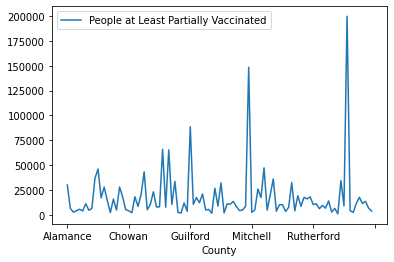

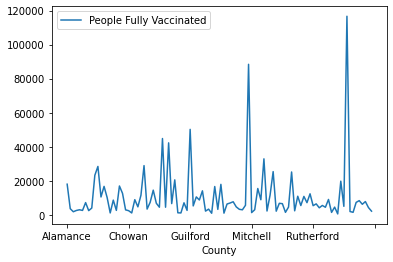

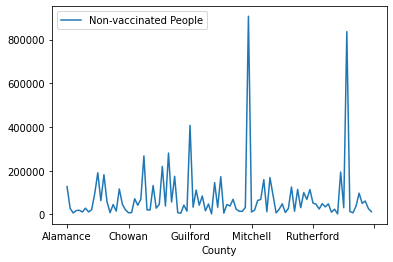

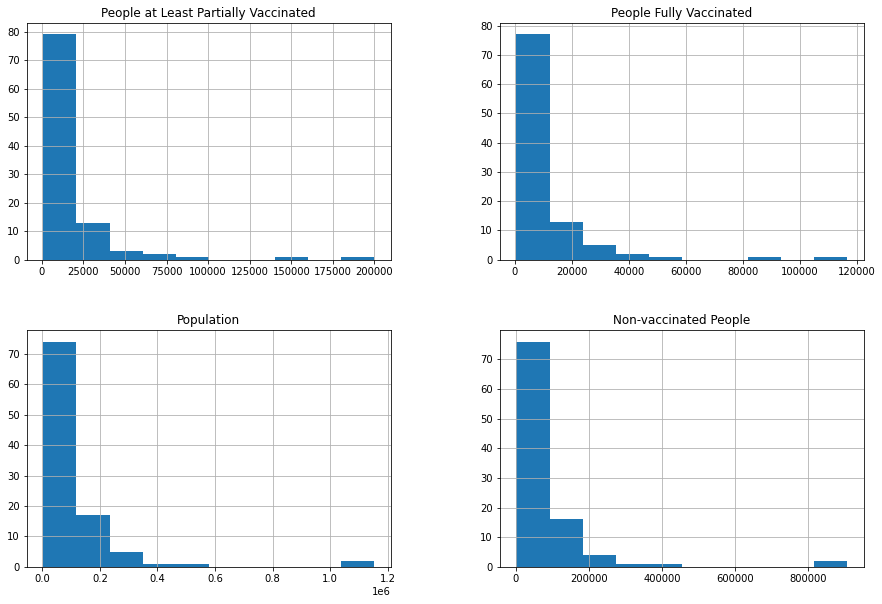

In [191]:
county_df.plot(kind='line', x='County', y= 'People at Least Partially Vaccinated')
county_df.plot(kind='line', x='County', y= 'People Fully Vaccinated')
county_df.plot(kind='line', x='County', y= 'Non-vaccinated People')

county_df.hist(figsize=(15,10))

In [192]:
demo_df.fillna(0)

,Index,County,Week of,American Indian or Alaskan Native,Asian or Pacific Islander,Black or African-American,White,Other,Suppressed,Missing or Undisclosed
0,1,Alamance,12/14/2020,0,7,10,85,5,0,0.0
1,2,Alamance,12/21/2020,2,22,79,457,28,0,0.0
2,3,Alamance,12/28/2020,5,20,156,817,49,0,0.0
3,4,Alamance,1/4/2021,9,28,236,"1,841",46,0,0.0
4,5,Alamance,1/11/2021,11,23,213,"1,648",38,0,0.0
...,...,...,...,...,...,...,...,...,...,...
1321,"1,322",Yancey,2/8/2021,0,0,0,159,5,0,3.0
1322,"1,323",Yancey,2/15/2021,0,0,0,84,1,3,0.0
1323,"1,324",Yancey,2/22/2021,0,0,0,308,0,2,9.0
1324,"1,325",Yancey,3/1/2021,0,0,0,489,9,11,145.0


In [196]:
# Change the data types to Float

demo_df['American Indian or Alaskan Native'] = pd.to_numeric(demo_df['American Indian or Alaskan Native'], errors='coerce')
demo_df['Asian or Pacific Islander'] = pd.to_numeric(demo_df['Asian or Pacific Islander'], errors='coerce')
demo_df['Black or African-American'] = pd.to_numeric(demo_df['Black or African-American'], errors='coerce')
demo_df['White'] = pd.to_numeric(demo_df['White'], errors='coerce')
demo_df['Other'] = pd.to_numeric(demo_df['Other'], errors='coerce')


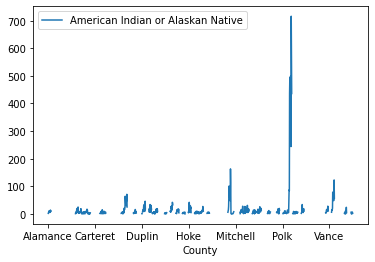

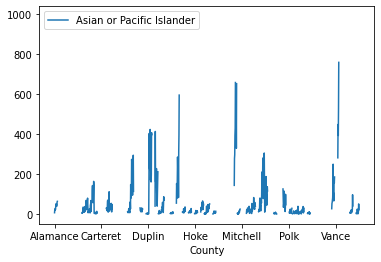

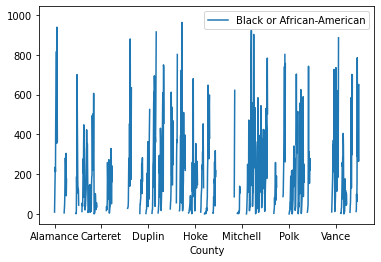

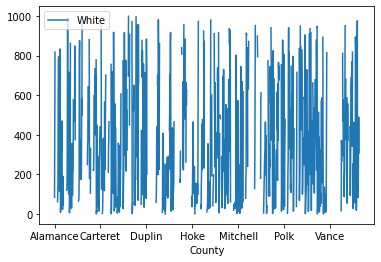

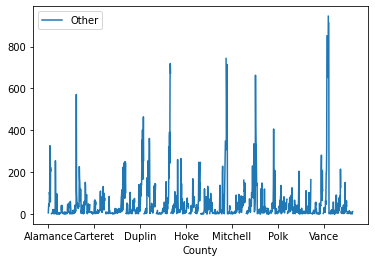

In [197]:
demo_df.plot(kind='line', x= 'County', y='American Indian or Alaskan Native')
demo_df.plot(kind='line', x= 'County', y='Asian or Pacific Islander')
demo_df.plot(kind='line', x= 'County', y='Black or African-American')
demo_df.plot(kind='line', x= 'County', y='White')
demo_df.plot(kind='line', x= 'County', y='Other')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ee85cf250>,
      dtype=object)

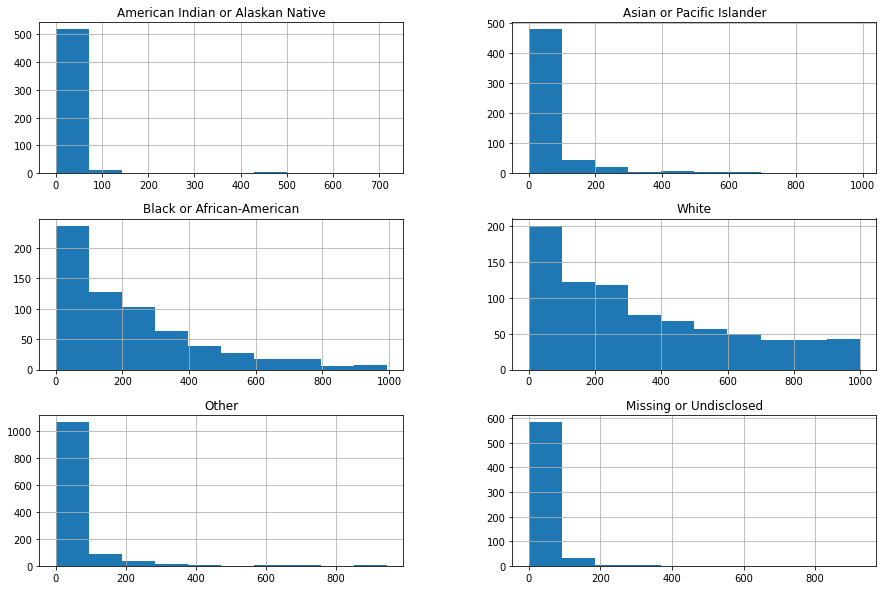

In [198]:
demo_df.hist(figsize=(15,10))

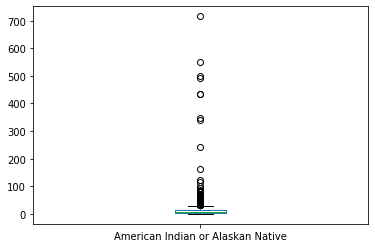

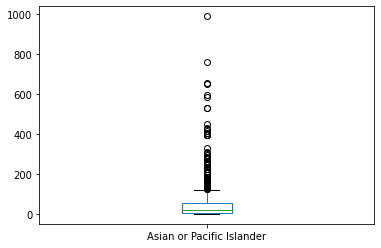

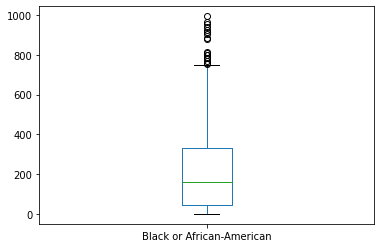

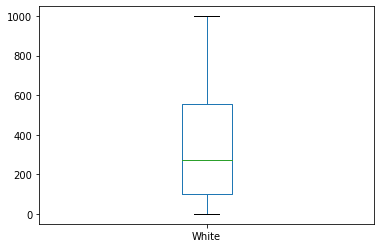

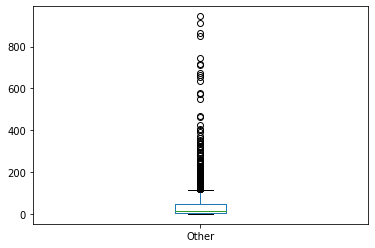

In [199]:
demo_df.plot(kind='box', x= 'County', y='American Indian or Alaskan Native')
demo_df.plot(kind='box', x= 'County', y='Asian or Pacific Islander')
demo_df.plot(kind='box', x= 'County', y='Black or African-American')
demo_df.plot(kind='box', x= 'County', y='White')
demo_df.plot(kind='box', x= 'County', y='Other')